In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("missings_filled.csv")

In [3]:
def first_overwiev(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

### 1) Km

In [ ]:
first_overwiev("km")

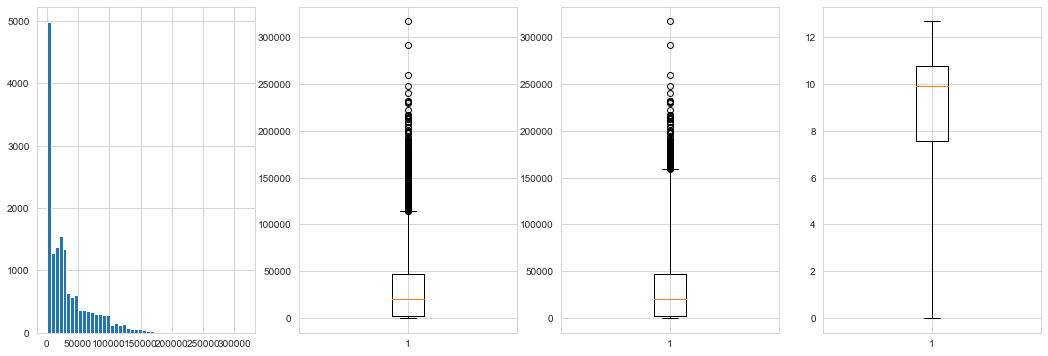

In [5]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.km, bins=50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)

plt.show()

**``km``** **is a variable with a wide range of values. We CANNOT consider the extreme values above as  genuine outliers. So let's keep these extreme values as they are.**

### 2) Gears

In [6]:
first_overwiev("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
6.000    8615
5.000    4256
7.000    2810
8.000     225
9.000       6
1.000       2
3.000       2
4.000       2
2.000       1
Name: Gears, dtype: int64


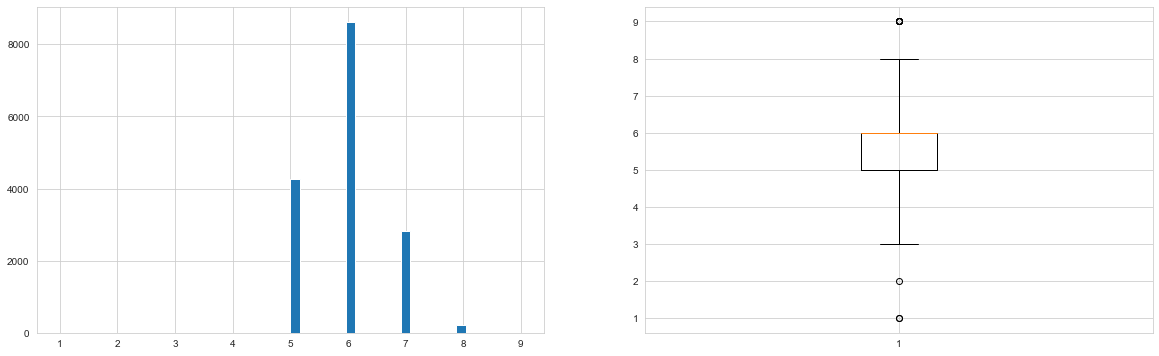

In [7]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [8]:
df.Gears.describe()

count   15919.000
mean        5.937
std         0.711
min         1.000
25%         5.000
50%         6.000
75%         6.000
max         9.000
Name: Gears, dtype: float64

In [9]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

15814   9.000
15812   9.000
15824   9.000
15869   9.000
15876   9.000
15827   9.000
12555   8.000
12549   8.000
12551   8.000
12552   8.000
Name: Gears, dtype: float64

In [10]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

8921    1.000
14375   1.000
9812    2.000
15817   3.000
15845   3.000
15823   4.000
15822   4.000
10427   5.000
10428   5.000
10429   5.000
Name: Gears, dtype: float64

In [12]:
# Let's check the observations having extreme Gear value.  
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing Type", "Gears"]]

,make_model,body_type,Gearing Type,Gears
8921,Opel Corsa,Compact,Semi-automatic,1.000
9812,Opel Corsa,Sedans,Manual,2.000
14375,Renault Clio,Compact,Automatic,1.000
15812,Renault Espace,Van,Automatic,9.000
15814,Renault Espace,Van,Automatic,9.000
15817,Renault Espace,Van,Automatic,3.000
15822,Renault Espace,Van,Automatic,4.000
15823,Renault Espace,Van,Automatic,4.000
15824,Renault Espace,Van,Automatic,9.000
15827,Renault Espace,Van,Automatic,9.000


In [14]:
# Let's check the observations belongs to "Renault Espace" model to see distribution of Gear values.  
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing Type", "Gears"]]

,make_model,body_type,Gearing Type,Gears
14928,Renault Espace,Van,Automatic,6.000
14929,Renault Espace,Station wagon,Automatic,6.000
14930,Renault Espace,Transporter,Automatic,6.000
14931,Renault Espace,Van,Automatic,6.000
14932,Renault Espace,Van,Automatic,6.000
14933,Renault Espace,Transporter,Automatic,6.000
14934,Renault Espace,Van,Automatic,6.000
14935,Renault Espace,Van,Automatic,6.000
14936,Renault Espace,Off-Road,Automatic,6.000
14937,Renault Espace,Van,Automatic,6.000


**Is it possible that there have been modern cars with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?**

Most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears. A few have as many as 10 [Source](https://www.quora.com/What-are-maximum-number-of-transmission-gears).
Contemporary manual transmissions for cars typically use five or six forward gears ratios and one reverse gear, however, transmissions with between two and seven gears have been produced at times [Source](https://en.wikipedia.org/wiki/Manual_transmission).

In [15]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [16]:
df.Gears.isnull().sum()

13

In [18]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [19]:
fill(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  0
------------------
6.000    8625
5.000    4259
7.000    2810
8.000     225
Name: Gears, dtype: int64


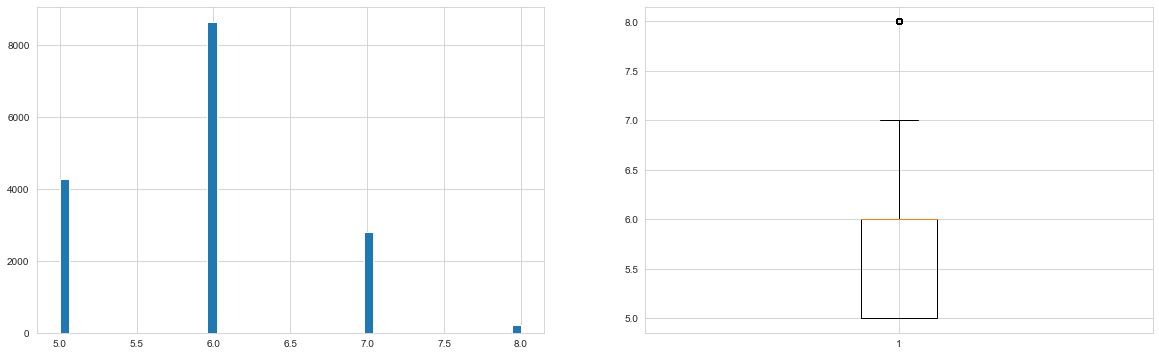

In [20]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

### 3) Displacement

In [21]:
first_overwiev("Displacement")

column name    :  Displacement
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.000     4871
999.000      2446
1398.000     1326
1399.000      753
1229.000      678
1956.000      670
1461.000      638
1490.000      559
1422.000      467
1197.000      355
898.000       351
1395.000      320
1968.000      301
1149.000      288
1600.000      258
1618.000      212
1798.000      210
1498.000      196
1400.000      136
1248.000      110
1997.000      103
1364.000      102
1500.000       96
998.000        72
2000.000       68
1000.000       56
1200.000       51
1300.000       38
1998.000       25
1.000          22
2480.000       20
1984.000       18
1397.000       11
899.000        11
900.000         9
160.000         6
1499.000        5
929.000         5
1596.000        4
997.000         4
1199.000        3
1599.000        3
139.000         3
1396.000        3
1589.000        2
995.000         2
1495.000  

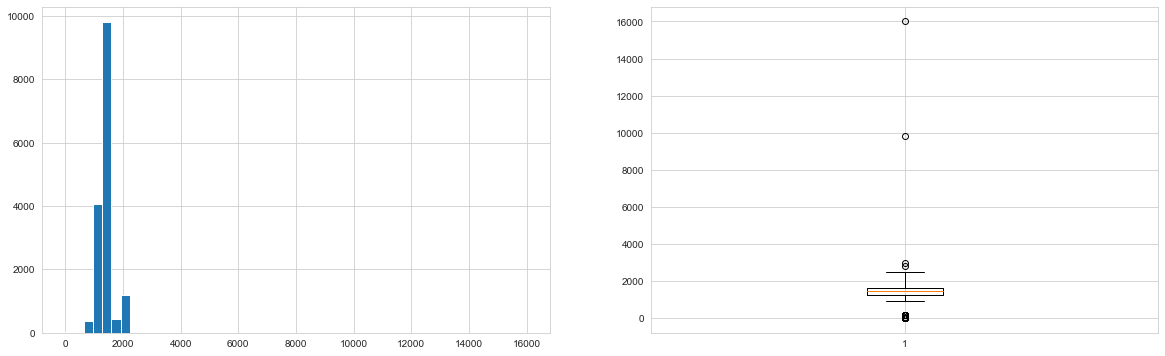

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement, whis=2.5)

plt.show()

In [24]:
df.Displacement.describe()

count   15919.000
mean     1426.917
std       313.589
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement, dtype: float64

In [25]:
df.sort_values(by=["Displacement"], ascending=False)["Displacement"].head(5)

10932   16000.000
1951     9800.000
10771    2967.000
10513    2800.000
3596     2480.000
Name: Displacement, dtype: float64

In [26]:
df.sort_values(by=["Displacement"], ascending=True)["Displacement"].head(55)

12670     1.000
12473     1.000
12484     1.000
12499     1.000
12501     1.000
12604     1.000
12849     1.000
12750     1.000
12768     1.000
12467     1.000
12769     1.000
12783     1.000
12786     1.000
12790     1.000
12796     1.000
12798     1.000
12800     1.000
12815     1.000
12823     1.000
12781     1.000
12835     1.000
12848     1.000
13912    54.000
7810    139.000
7809    139.000
7811    139.000
8128    140.000
15579   160.000
15578   160.000
15577   160.000
15576   160.000
15575   160.000
15574   160.000
13653   890.000
14673   898.000
14674   898.000
14684   898.000
14676   898.000
14677   898.000
14678   898.000
14679   898.000
14680   898.000
14681   898.000
14683   898.000
14675   898.000
14682   898.000
14529   898.000
14672   898.000
14686   898.000
14687   898.000
14688   898.000
14690   898.000
14691   898.000
14693   898.000
14694   898.000
Name: Displacement, dtype: float64

In [27]:
outlier_bool_list = df.Displacement.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [28]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement, Length: 15919, dtype: bool

In [29]:
df.loc[outlier_bool_list, "Displacement"] = np.nan

In [30]:
df.Displacement.isnull().sum()

34

In [32]:
fill(df, "make_model", "body_type", "Displacement", "mode")

Number of NaN :  0
------------------
1598.000    4901
999.000     2446
1398.000    1326
1399.000     756
1229.000     678
1956.000     670
1461.000     639
1490.000     559
1422.000     467
1197.000     355
898.000      351
1395.000     320
1968.000     301
1149.000     288
1600.000     258
1618.000     212
1798.000     210
1498.000     196
1400.000     136
1248.000     110
1997.000     103
1364.000     102
1500.000      96
998.000       72
2000.000      68
1000.000      56
1200.000      51
1300.000      38
1998.000      25
2480.000      20
1984.000      18
899.000       11
1397.000      11
900.000        9
1499.000       5
929.000        5
1596.000       4
997.000        4
1599.000       3
1199.000       3
1396.000       3
1589.000       2
1495.000       2
995.000        2
1239.000       1
1896.000       1
1700.000       1
1580.000       1
1686.000       1
1333.000       1
1100.000       1
1696.000       1
890.000        1
996.000        1
9800.000       1
1568.000       1
1995.000  

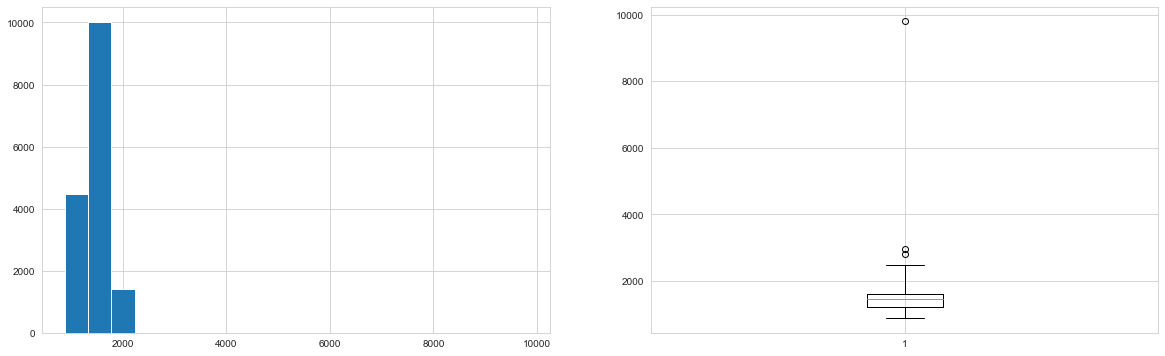

In [33]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement, bins=20)

plt.subplot(122)
plt.boxplot(df.Displacement, whis=2.5)

plt.show()

### 4) Weight

In [34]:
first_overwiev("Weight")

column name    :  Weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.000    1582
1360.000    1419
1487.000     966
1135.000     837
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1260.000     127
1280.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1209.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000  

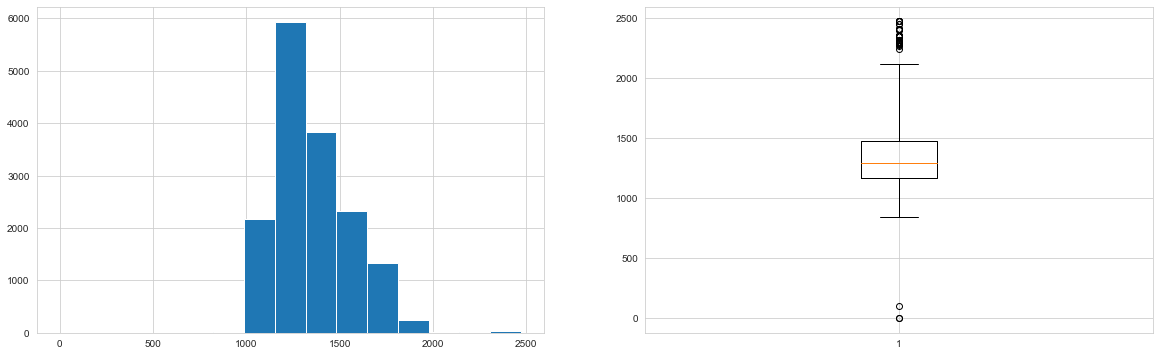

In [36]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight, whis=2.5)

plt.show()

In [38]:
df.Weight.describe()

count   15919.000
mean     1337.432
std       200.466
min         1.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: Weight, dtype: float64

In [39]:
df["Weight"].sort_values().head(10)

8355      1.000
12779     1.000
1143    102.000
8857    840.000
14313   900.000
13513   977.000
13555   977.000
14654   980.000
14105   980.000
13999   980.000
Name: Weight, dtype: float64

In [40]:
df["Weight"].replace([1, 102], np.nan, inplace = True)

In [42]:
df["Weight"].isnull().sum()

3

In [43]:
fill(df, "make_model", "body_type", "Weight", "mode")

Number of NaN :  0
------------------
1163.000    1583
1360.000    1419
1487.000     967
1135.000     837
1425.000     744
1180.000     695
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1280.000     127
1260.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1071.000      64
1141.000      64
1209.000      64
1325.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
1237.000      49
1440.000      46
1205.000      46
1088.000      46
1265.000  

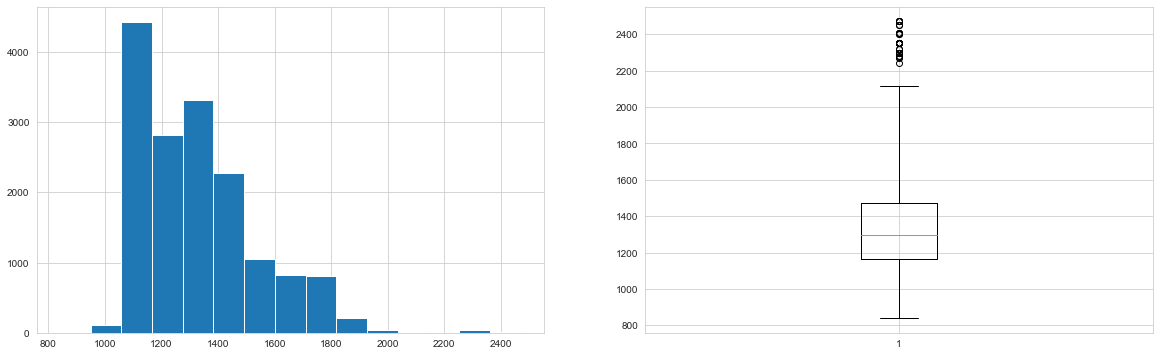

In [45]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight, whis=2.5)

plt.show()

### 5) hp

In [46]:
first_overwiev("hp")

column name    :  hp
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.000     2543
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000       3


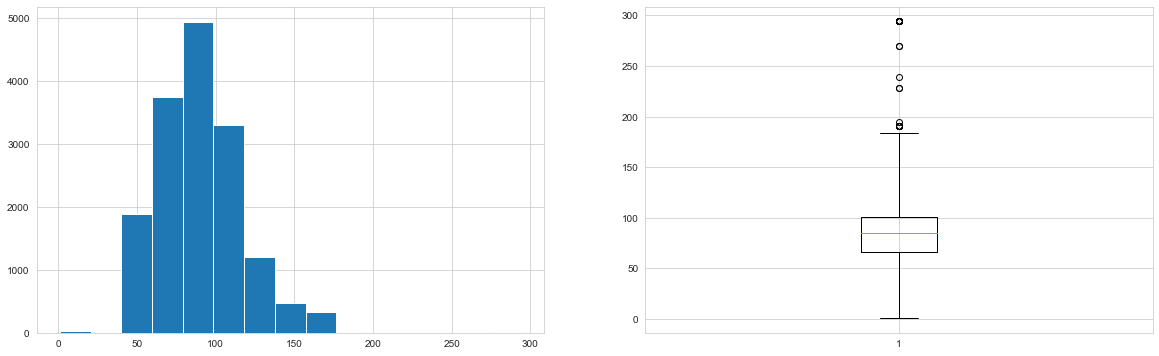

In [47]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp, bins=15)

plt.subplot(122)
plt.boxplot(df.hp, whis=2.5)

plt.show()

In [48]:
df.hp.describe()

count   15919.000
mean       88.374
std        26.844
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp, dtype: float64

In [49]:
df.hp.sort_values().head(50)

6034     1.000
6946     1.000
7014     1.000
9285     1.000
9287     1.000
6005     1.000
9288     1.000
7018     1.000
9289     1.000
9290     1.000
9292     1.000
9299     1.000
10610    1.000
10580    1.000
10579    1.000
10468    1.000
15155    1.000
15156    1.000
7019     1.000
7016     1.000
13885    4.000
3913     9.000
8857    40.000
13759   40.000
8408    44.000
10282   51.000
10283   51.000
10284   51.000
10285   51.000
10286   51.000
10287   51.000
9145    51.000
10288   51.000
10346   51.000
10281   51.000
10330   51.000
9026    51.000
9025    51.000
10342   51.000
10289   51.000
9159    51.000
9384    51.000
9158    51.000
10290   51.000
10291   51.000
10345   51.000
10280   51.000
10279   51.000
10278   51.000
10264   51.000
Name: hp, dtype: float64

In [50]:
np.sort(df.hp.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

In [51]:
df.hp.loc[df.hp < 51] = np.nan

In [53]:
fill(df, "make_model", "body_type", "hp", "mode")

Number of NaN :  0
------------------
85.000     2544
66.000     2126
81.000     1403
100.000    1317
110.000    1117
70.000      890
125.000     715
51.000      703
55.000      589
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      296
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
80.000        3
93.000        3
168.000       3
149.000       3
98.000        3
150.000       2
228.000       2
53.000        2
270.000       2
86.000        2
167.000       2
63

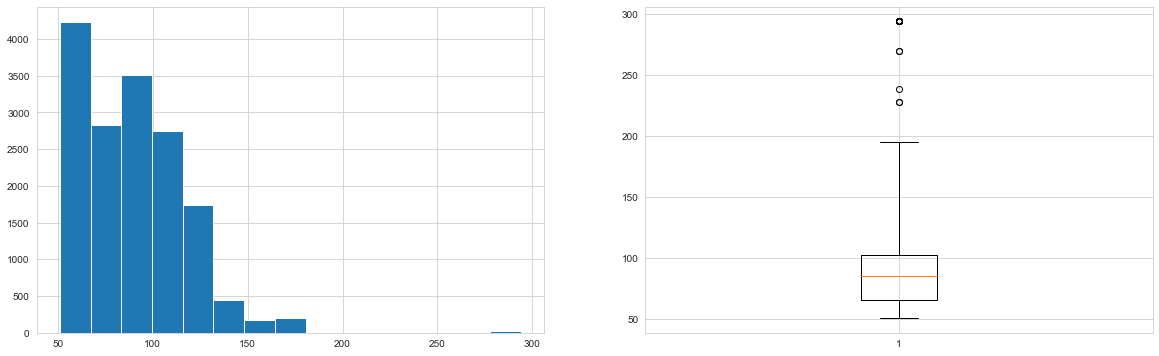

In [54]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp, bins=15)

plt.subplot(122)
plt.boxplot(df.hp, whis=2.5)

plt.show()

### 7) CO2 Emission

In [56]:
first_overwiev("CO2 Emission")

column name    :  CO2 Emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  119
--------------------------------
120.000    1116
97.000      836
99.000      753
114.000     594
119.000     581
102.000     532
104.000     501
85.000      464
107.000     458
103.000     445
124.000     426
128.000     414
106.000     377
117.000     362
108.000     362
127.000     302
126.000     288
110.000     286
150.000     282
113.000     272
118.000     270
140.000     245
111.000     237
139.000     236
109.000     234
129.000     215
141.000     209
105.000     205
135.000     204
92.000      198
112.000     186
130.000     180
123.000     178
143.000     171
145.000     167
134.000     165
95.000      161
116.000     157
136.000     152
98.000      151
133.000     145
153.000     139
137.000     133
125.000     132
149.000     117
147.000     113
101.000     105
132.000     100
115.000      91
122.000      83
121.000      82
138.000      75
93.00

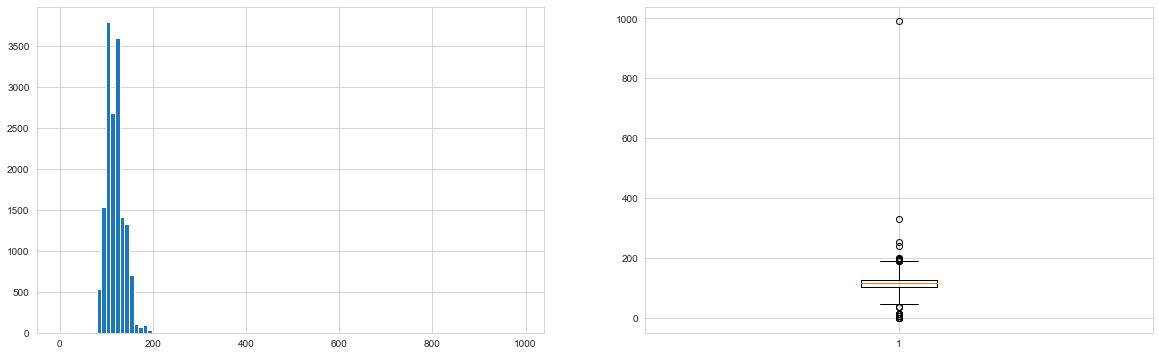

In [57]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["CO2 Emission"], bins=100)

plt.subplot(122)
plt.boxplot(df["CO2 Emission"], whis=2.5)

plt.show()

In [58]:
df["CO2 Emission"].describe()

count   15919.000
mean      117.494
std        20.028
min         0.000
25%       103.500
50%       117.000
75%       128.000
max       990.000
Name: CO2 Emission, dtype: float64

In [59]:
df["CO2 Emission"].value_counts().sort_index()

0.000         2
1.000         3
5.000         3
12.000        4
13.000        1
14.000        2
36.000        3
45.000        1
51.000        1
80.000        1
82.000       25
84.000        2
85.000      464
87.000        6
88.000       15
89.000       19
90.000       35
91.000       31
92.000      198
93.000       66
94.000       37
95.000      161
96.000       22
97.000      836
98.000      151
99.000      753
100.000      56
101.000     105
102.000     532
103.000     445
104.000     501
105.000     205
106.000     377
107.000     458
108.000     362
109.000     234
110.000     286
111.000     237
112.000     186
113.000     272
114.000     594
115.000      91
116.000     157
117.000     362
118.000     270
119.000     581
120.000    1116
121.000      82
122.000      83
123.000     178
124.000     426
125.000     132
126.000     288
127.000     302
128.000     414
129.000     215
130.000     180
131.000      48
132.000     100
133.000     145
134.000     165
135.000     204
136.000 

In [60]:
df.groupby(["make_model", "body_type", "CO2 Emission"]).price.describe()

count      mean       std  \
make_model     body_type     CO2 Emission                               
Audi A1        Compact       90.000         1.000 12880.000       NaN   
                             91.000         5.000 13038.000  1108.927   
                             92.000         1.000 12479.000       NaN   
                             94.000         5.000 13960.000  1232.071   
                             97.000       181.000 16505.044  3408.048   
                             98.000        33.000 16574.364  2637.087   
                             99.000        19.000 16043.947  2257.403   
                             100.000        4.000 16127.500  1583.401   
                             102.000      157.000 16688.529  2947.408   
                             103.000       30.000 21233.033  1794.551   
                             104.000      126.000 17411.413  3149.373   
                             105.000       14.000 22234.857   812.264   
                             106.000       43.000 19831.791  3335.793   
                             107.000       13.000 16527.692  1620.412   
                             108.000       42.000 23587.095  3375.693   
                             109.000       34.000 17029.324  2514.314   
                             110.000       51.000 26340.373  2434.738   
                             111.000      138.000 23765.283  3477.921   
                             112.000       29.000 19947.034  2811.047   
                             113.000        5.000 20388.000  2796.188   
                             114.000        1.000 15490.000       NaN   
                             115.000       12.000 23521.667  5282.960   
                             116.000       20.000 23580.950  2813.103   
                             117.000        8.000 19094.875  2942.954   
                             118.000        2.000 13615.000    91.924   
                             119.000        1.000 12550.000       NaN   
                             120.000       30.000 15808.000   578.693   
                             121.000        2.000 18710.000  3224.407   
                             122.000        1.000 20881.000       NaN   
                             123.000       17.000 19308.647  3816.070   
                             126.000        1.000 19999.000       NaN   
                             127.000        2.000 19888.000     0.000   
                             134.000        2.000 22495.000   841.457   
                             136.000        4.000 28889.250   467.529   
                             137.000        2.000 28660.000   282.843   
                             142.000        2.000 28750.000   268.701   
                             331.000        1.000 12990.000       NaN   
               Coupe         97.000         2.000 14925.000  1378.858   
               Sedans        89.000         4.000 16572.500   288.141   
                             90.000         3.000 14396.333   532.382   
                             91.000        14.000 14228.500  1438.927   
                             92.000        42.000 15764.548  1578.276   
                             94.000        12.000 15710.000  2522.329   
                             95.000         2.000 13070.000  2305.168   
                             97.000       486.000 16979.737  4082.492   
                             98.000        66.000 16021.848  1512.571   
                             99.000       103.000 16135.913  2125.303   
                             100.000        3.000 14490.000     0.000   
                             101.000        5.000 19228.000  1683.574   
                             102.000      228.000 17297.500  2627.855   
                             103.000       10.000 17725.000  3092.084   
                             104.000       88.000 18441.466  3010.822   
                             105.000       55.000 19634.273  2174.292   
                             

In [62]:
cond = ((df["CO2 Emission"] < 36) | (df["CO2 Emission"] > 330))

df.loc[cond, "CO2 Emission"] = np.nan

In [63]:
df["CO2 Emission"].isnull().sum()

17

In [64]:
fill(df, "make_model", "body_type", "CO2 Emission", "median")

Number of NaN :  0
------------------
120.000    1116
97.000      836
99.000      753
114.000     594
119.000     587
102.000     532
104.000     502
85.000      464
107.000     458
103.000     445
124.000     426
128.000     414
106.000     379
117.000     362
108.000     362
127.000     302
126.000     288
110.000     286
150.000     282
113.000     272
118.000     270
140.000     245
139.000     240
111.000     237
109.000     234
129.000     216
141.000     209
105.000     205
135.000     204
92.000      198
112.000     186
130.000     180
123.000     178
143.000     171
145.000     167
134.000     165
95.000      161
116.000     157
136.000     152
98.000      151
133.000     146
153.000     139
137.000     133
125.000     132
149.000     117
147.000     113
101.000     105
132.000     100
115.000      91
122.000      83
121.000      82
138.000      75
93.000       66
142.000      58
168.000      58
100.000      56
187.000      53
148.000      48
131.000      48
144.000      40
15

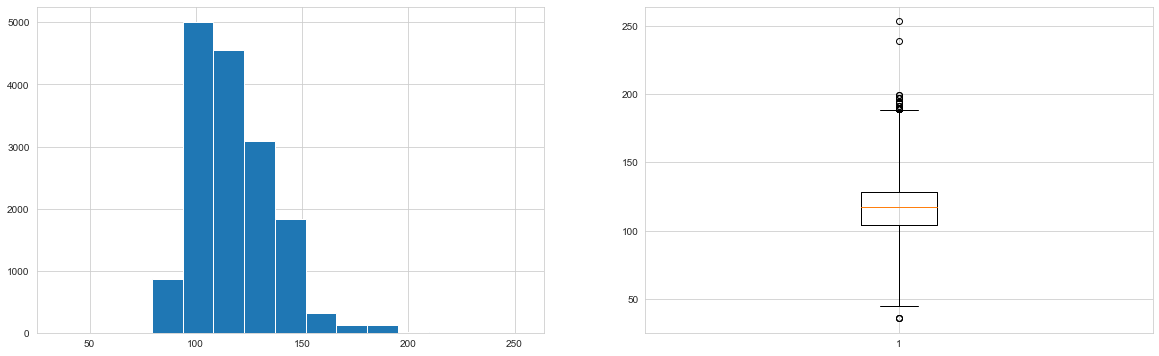

In [65]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["CO2 Emission"], bins=15)

plt.subplot(122)
plt.boxplot(df["CO2 Emission"], whis=2.5)

plt.show()

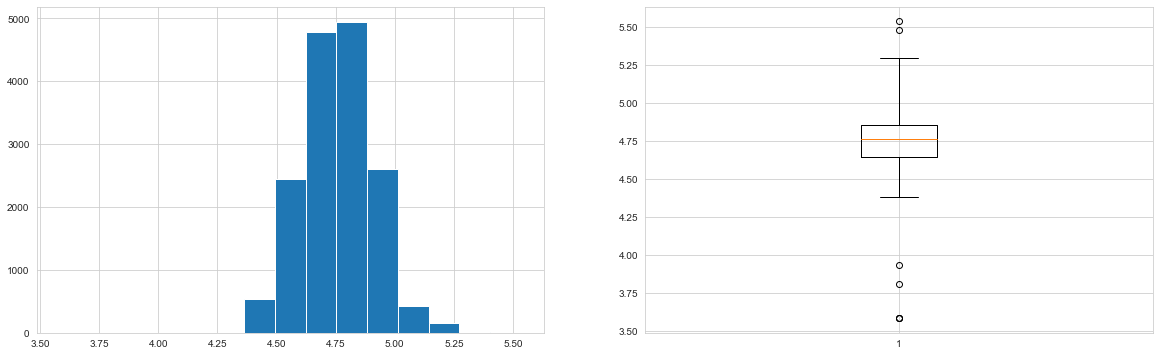

In [67]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(np.log(df["CO2 Emission"]), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df["CO2 Emission"]), whis=2.5)

plt.show()

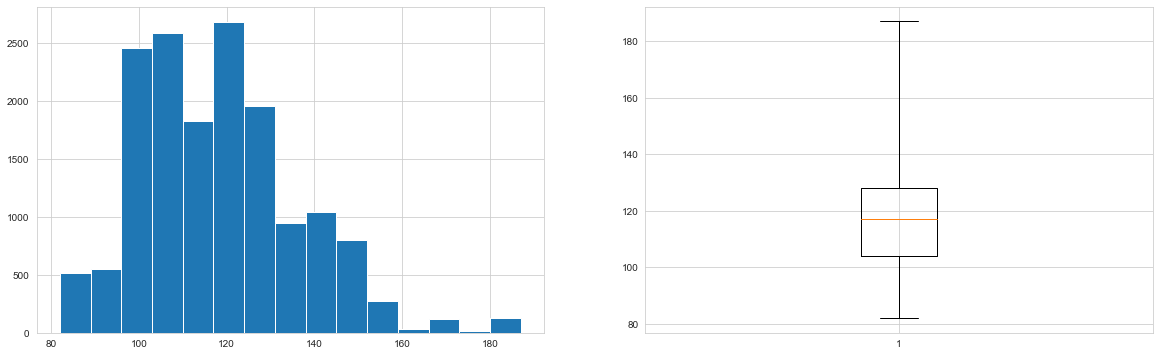

In [68]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(winsorize(df["CO2 Emission"], (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df["CO2 Emission"], (0.001, 0.003)), whis=2.5)

plt.show()

In [69]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'hp', 'Type',
       'Previous Owners', 'Inspection new', 'Body Color', 'Paint Type',
       'Body Color Original', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Weight', 'Drive chain', 'Fuel',
       'CO2 Emission', 'Comfort & Convenience', 'Entertainment & Media',
       'Extras', 'Safety & Security', 'Gears', 'age', 'Upholstery_type',
       'Consumption_combined', 'Consumption_city', 'Consumption_country'],
      dtype='object')

### 8) Consumption_combined

In [ ]:
# first_overwiev("Consumption_combined")

In [73]:
df["Consumption_combined"].describe()

count   15919.000
mean        4.874
std         1.557
min         0.000
25%         4.100
50%         4.800
75%         5.400
max        55.000
Name: Consumption_combined, dtype: float64

**Considering our domain knowledge, we can conclude that min value of 1.6 and max value of 9.10 are normal.**

### 9) Number of Doors

In [75]:
first_overwiev("Nr. of Doors")

column name    :  Nr. of Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64


In [76]:
df["Nr. of Doors"].replace([1, 7], np.nan, inplace=True)

In [77]:
fill(df, "make_model", "body_type", "Nr. of Doors", "mode")

Number of NaN :  0
------------------
5.000    11789
4.000     3079
3.000      832
2.000      219
Name: Nr. of Doors, dtype: int64


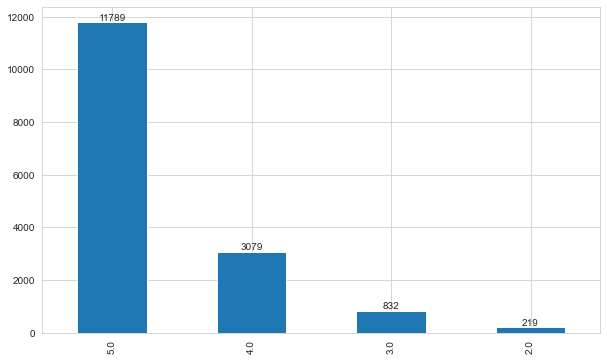

In [79]:
fig, ax = plt.subplots()

df["Nr. of Doors"].value_counts(dropna = False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

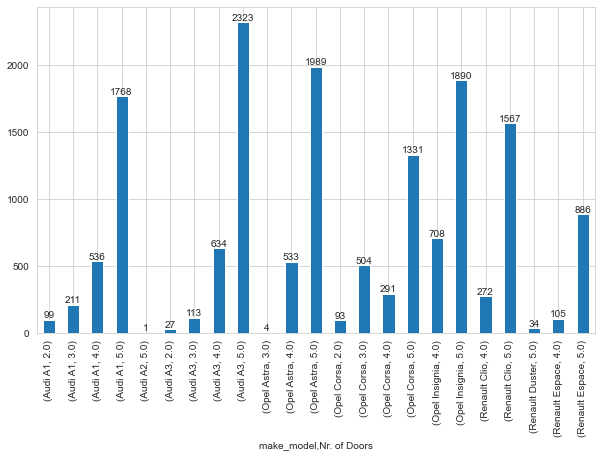

In [82]:
fig, ax=plt.subplots()
df.groupby(["make_model","Nr. of Doors"])["Nr. of Doors"].count().plot.bar()
for container in ax.containers:
    ax.bar_label(container);

In [83]:
df.drop("Nr. of Doors", axis=1, inplace=True)

### 10) Number of Seats

In [80]:
first_overwiev("Nr. of Seats")

column name    :  Nr. of Seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64


In [84]:
df["Nr. of Seats"].replace([3, 6], np.nan, inplace=True)

In [85]:
df["Nr. of Seats"].isnull().sum()

3

In [86]:
fill(df, "make_model", "body_type", "Nr. of Seats", "mode")

Number of NaN :  0
------------------
5.000    14311
4.000     1127
7.000      362
2.000      119
Name: Nr. of Seats, dtype: int64


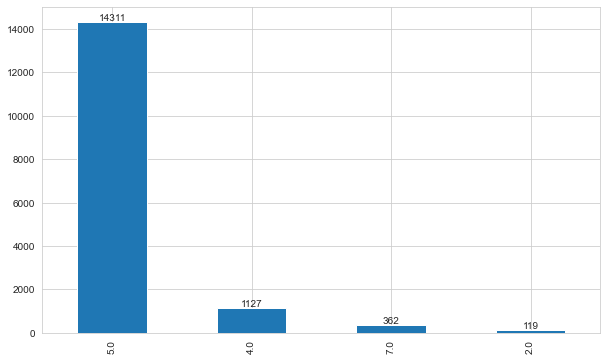

In [87]:
fig, ax = plt.subplots()

df["Nr. of Seats"].value_counts(dropna=False).plot.bar()

for container in ax.containers:
    ax.bar_label(container);

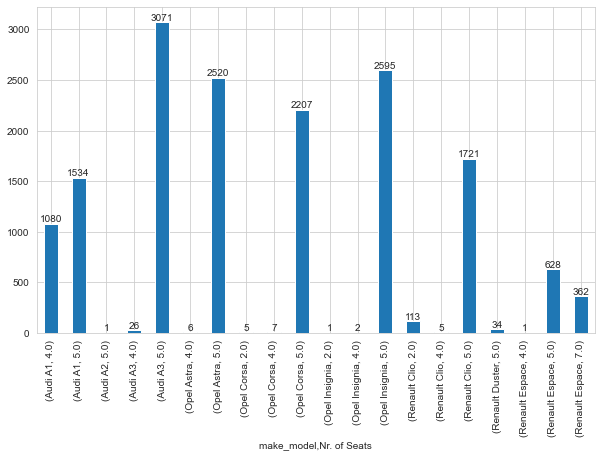

In [88]:
fig, ax = plt.subplots()

df.groupby(["make_model", "Nr. of Seats"])["Nr. of Seats"].count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [89]:
df.drop("Nr. of Seats", axis=1, inplace=True)

### 11) Price

In [90]:
first_overwiev("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


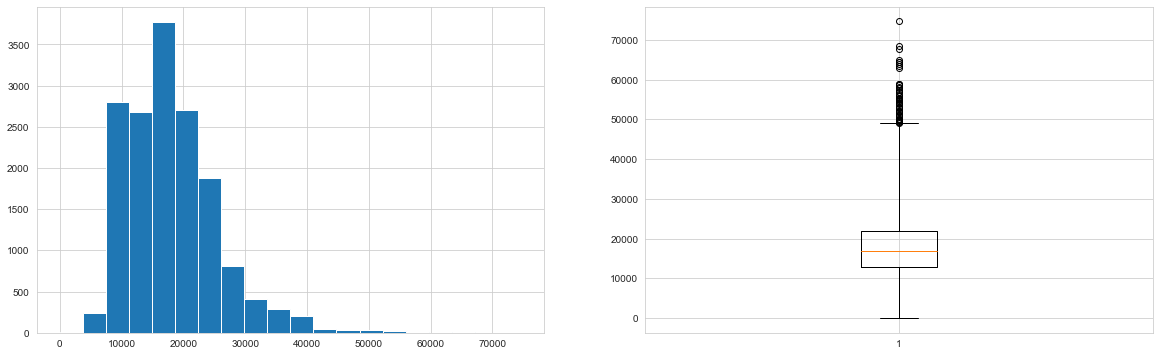

In [91]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [92]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [93]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [94]:
df.drop( df.price.sort_values().index[:4], axis=0, inplace=True)

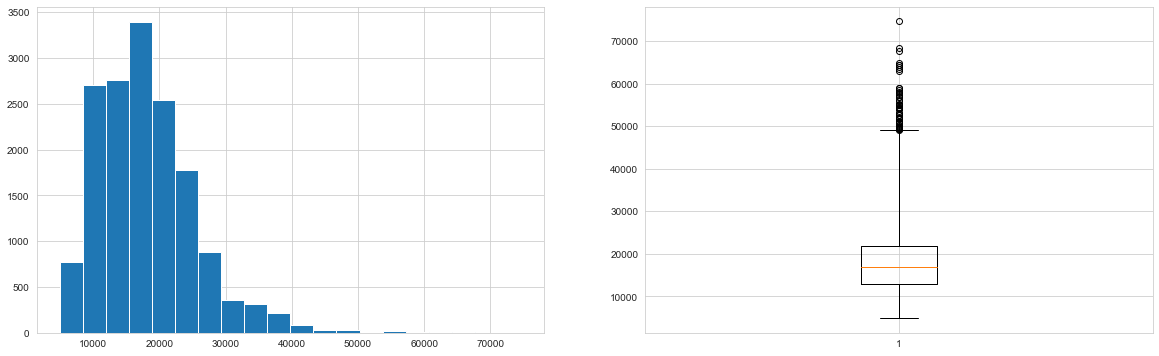

In [95]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

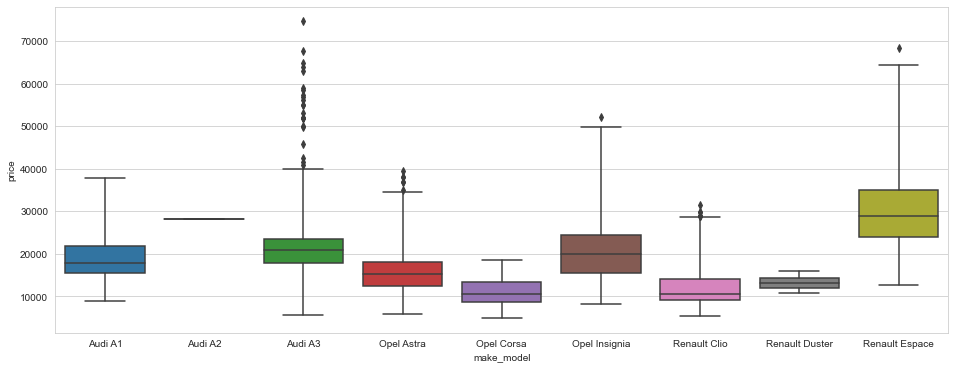

In [96]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

### 12) Make_model

In [97]:
first_overwiev("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [98]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,hp,Type,Previous Owners,Inspection new,Body Color,Paint Type,Body Color Original,Model Code,Gearing Type,Displacement,Weight,Drive chain,Fuel,CO2 Emission,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,age,Upholstery_type,Consumption_combined,Consumption_city,Consumption_country
2614,Audi A2,Off-Road,28200,26166.000,85.000,Employee's car,1.000,No,Grey,Metallic,G3 Nanograu Metallic,0588/BJV,Manual,1598.000,1135.000,front,Diesel,186.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000,1.000,Cloth,4.900,5.600,4.500


**``Audi A2``** (internally designated Typ 8Z) is a compact MPV-styled supermini car, with a five-door hatchback body style and four or five seats, produced by the German manufacturer Audi **from November 1999 (for the 2000 model year) to August 2005** [Source](https://en.wikipedia.org/wiki/Audi_A2). **So it is impossible to be a 1-year old Audi A2**.

In [99]:
df.drop(df[df.make_model == "Audi A2"].index, axis=0, inplace=True)

### 13) Fuel

In [100]:
first_overwiev("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine    8546
Diesel     7297
Gas          64
Others        7
Name: Fuel, dtype: int64


###  Last Step

In [102]:
df.head(5).T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.000,80000.000,83450.000,73000.000,16200.000
hp,66.000,141.000,85.000,66.000,66.000
Type,Used,Used,Used,Used,Used
Previous Owners,2.000,1.000,1.000,1.000,1.000
Inspection new,Yes,No,No,No,Yes
Body Color,Black,Red,Black,Brown,Black
Paint Type,Metallic,Metallic,Metallic,Metallic,Metallic


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15914 non-null  object 
 1   body_type              15914 non-null  object 
 2   price                  15914 non-null  int64  
 3   km                     15914 non-null  float64
 4   hp                     15914 non-null  float64
 5   Type                   15914 non-null  object 
 6   Previous Owners        15914 non-null  float64
 7   Inspection new         15914 non-null  object 
 8   Body Color             15317 non-null  object 
 9   Paint Type             15914 non-null  object 
 10  Body Color Original    12142 non-null  object 
 11  Model Code             4976 non-null   object 
 12  Gearing Type           15914 non-null  object 
 13  Displacement           15914 non-null  float64
 14  Weight                 15914 non-null  float64
 15  Dr

In [105]:
df_num = df.select_dtypes("number")
df_num

,price,km,hp,Previous Owners,Displacement,Weight,CO2 Emission,Gears,age,Consumption_combined,Consumption_city,Consumption_country
0,15770,56013.000,66.000,2.000,1422.000,1220.000,99.000,7.000,3.000,3.800,4.300,3.500
1,14500,80000.000,141.000,1.000,1798.000,1255.000,129.000,7.000,2.000,5.600,7.100,4.700
2,14640,83450.000,85.000,1.000,1598.000,1135.000,99.000,7.000,3.000,3.800,4.400,3.400
3,14500,73000.000,66.000,1.000,1422.000,1195.000,99.000,6.000,3.000,3.800,4.300,3.500
4,16790,16200.000,66.000,1.000,1422.000,1135.000,109.000,7.000,3.000,4.100,4.600,3.800
...,...,...,...,...,...,...,...,...,...,...,...,...
15914,39950,16.987,147.000,1.000,1997.000,1758.000,139.000,6.000,0.000,5.300,6.200,4.700
15915,39885,9900.000,165.000,1.000,1798.000,1708.000,168.000,7.000,1.000,7.400,9.200,6.300
15916,39875,15.000,146.000,1.000,1997.000,1734.000,139.000,6.000,0.000,5.300,6.200,4.700
15917,39700,10.000,147.000,0.000,1997.000,1758.000,139.000,6.000,0.000,5.300,6.200,4.700


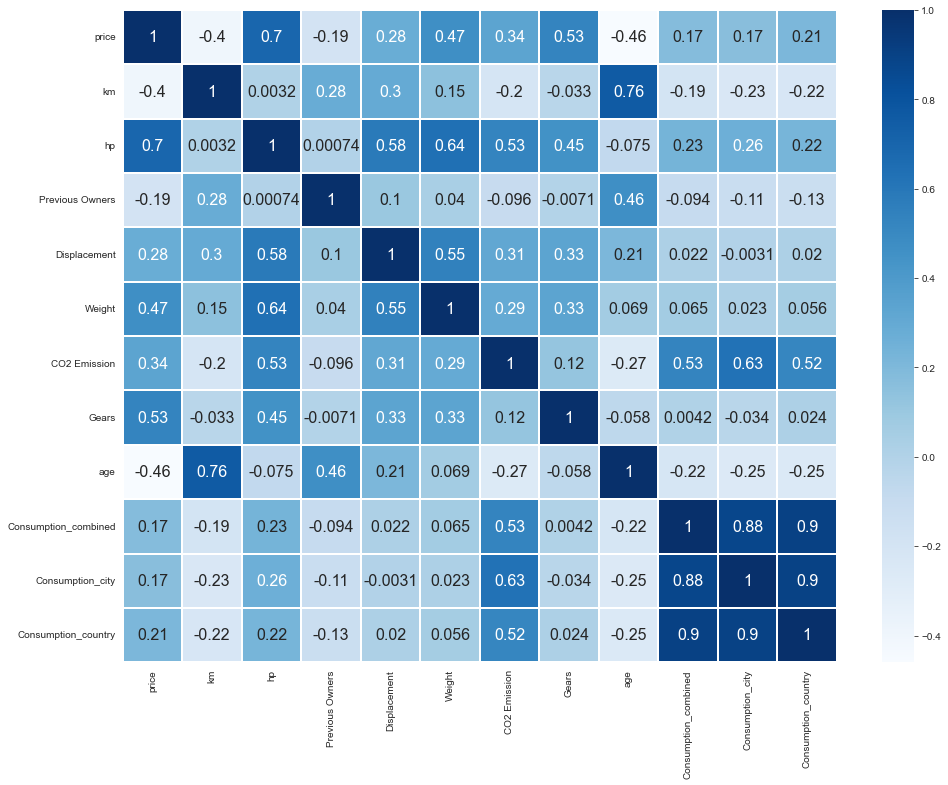

In [106]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 16});

In [107]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,price,km,hp,Previous Owners,Displacement,Weight,CO2 Emission,Gears,age,Consumption_combined,Consumption_city,Consumption_country
price,1.000000,-0.400903,0.696419,-0.188583,0.277338,0.468564,0.336411,0.530214,-0.459748,0.174005,0.165312,0.209374
km,-0.400903,1.000000,0.003214,0.284877,0.297253,0.146329,-0.204734,-0.033436,0.760367,-0.194845,-0.234629,-0.221895
hp,0.696419,0.003214,1.000000,0.000738,0.583838,0.638207,0.529433,0.449465,-0.075347,0.232834,0.261385,0.224922
Previous Owners,-0.188583,0.284877,0.000738,1.000000,0.102601,0.040287,-0.095630,-0.007123,0.464162,-0.094246,-0.112588,-0.128912
Displacement,0.277338,0.297253,0.583838,0.102601,1.000000,0.545826,0.312219,0.334919,0.208559,0.022267,-0.003119,0.020259
Weight,0.468564,0.146329,0.638207,0.040287,0.545826,1.000000,0.294843,0.333949,0.069190,0.065399,0.022992,0.056430
CO2 Emission,0.336411,-0.204734,0.529433,-0.095630,0.312219,0.294843,1.000000,0.120966,-0.265456,0.526824,0.626282,0.517088
Gears,0.530214,-0.033436,0.449465,-0.007123,0.334919,0.333949,0.120966,1.000000,-0.058289,0.004161,-0.034463,0.023703
age,-0.459748,0.760367,-0.075347,0.464162,0.208559,0.069190,-0.265456,-0.058289,1.000000,-0.215007,-0.254781,-0.250046
Consumption_combined,0.174005,-0.194845,0.232834,-0.094246,0.022267,0.065399,0.526824,0.004161,-0.215007,1.000000,0.876860,0.903412


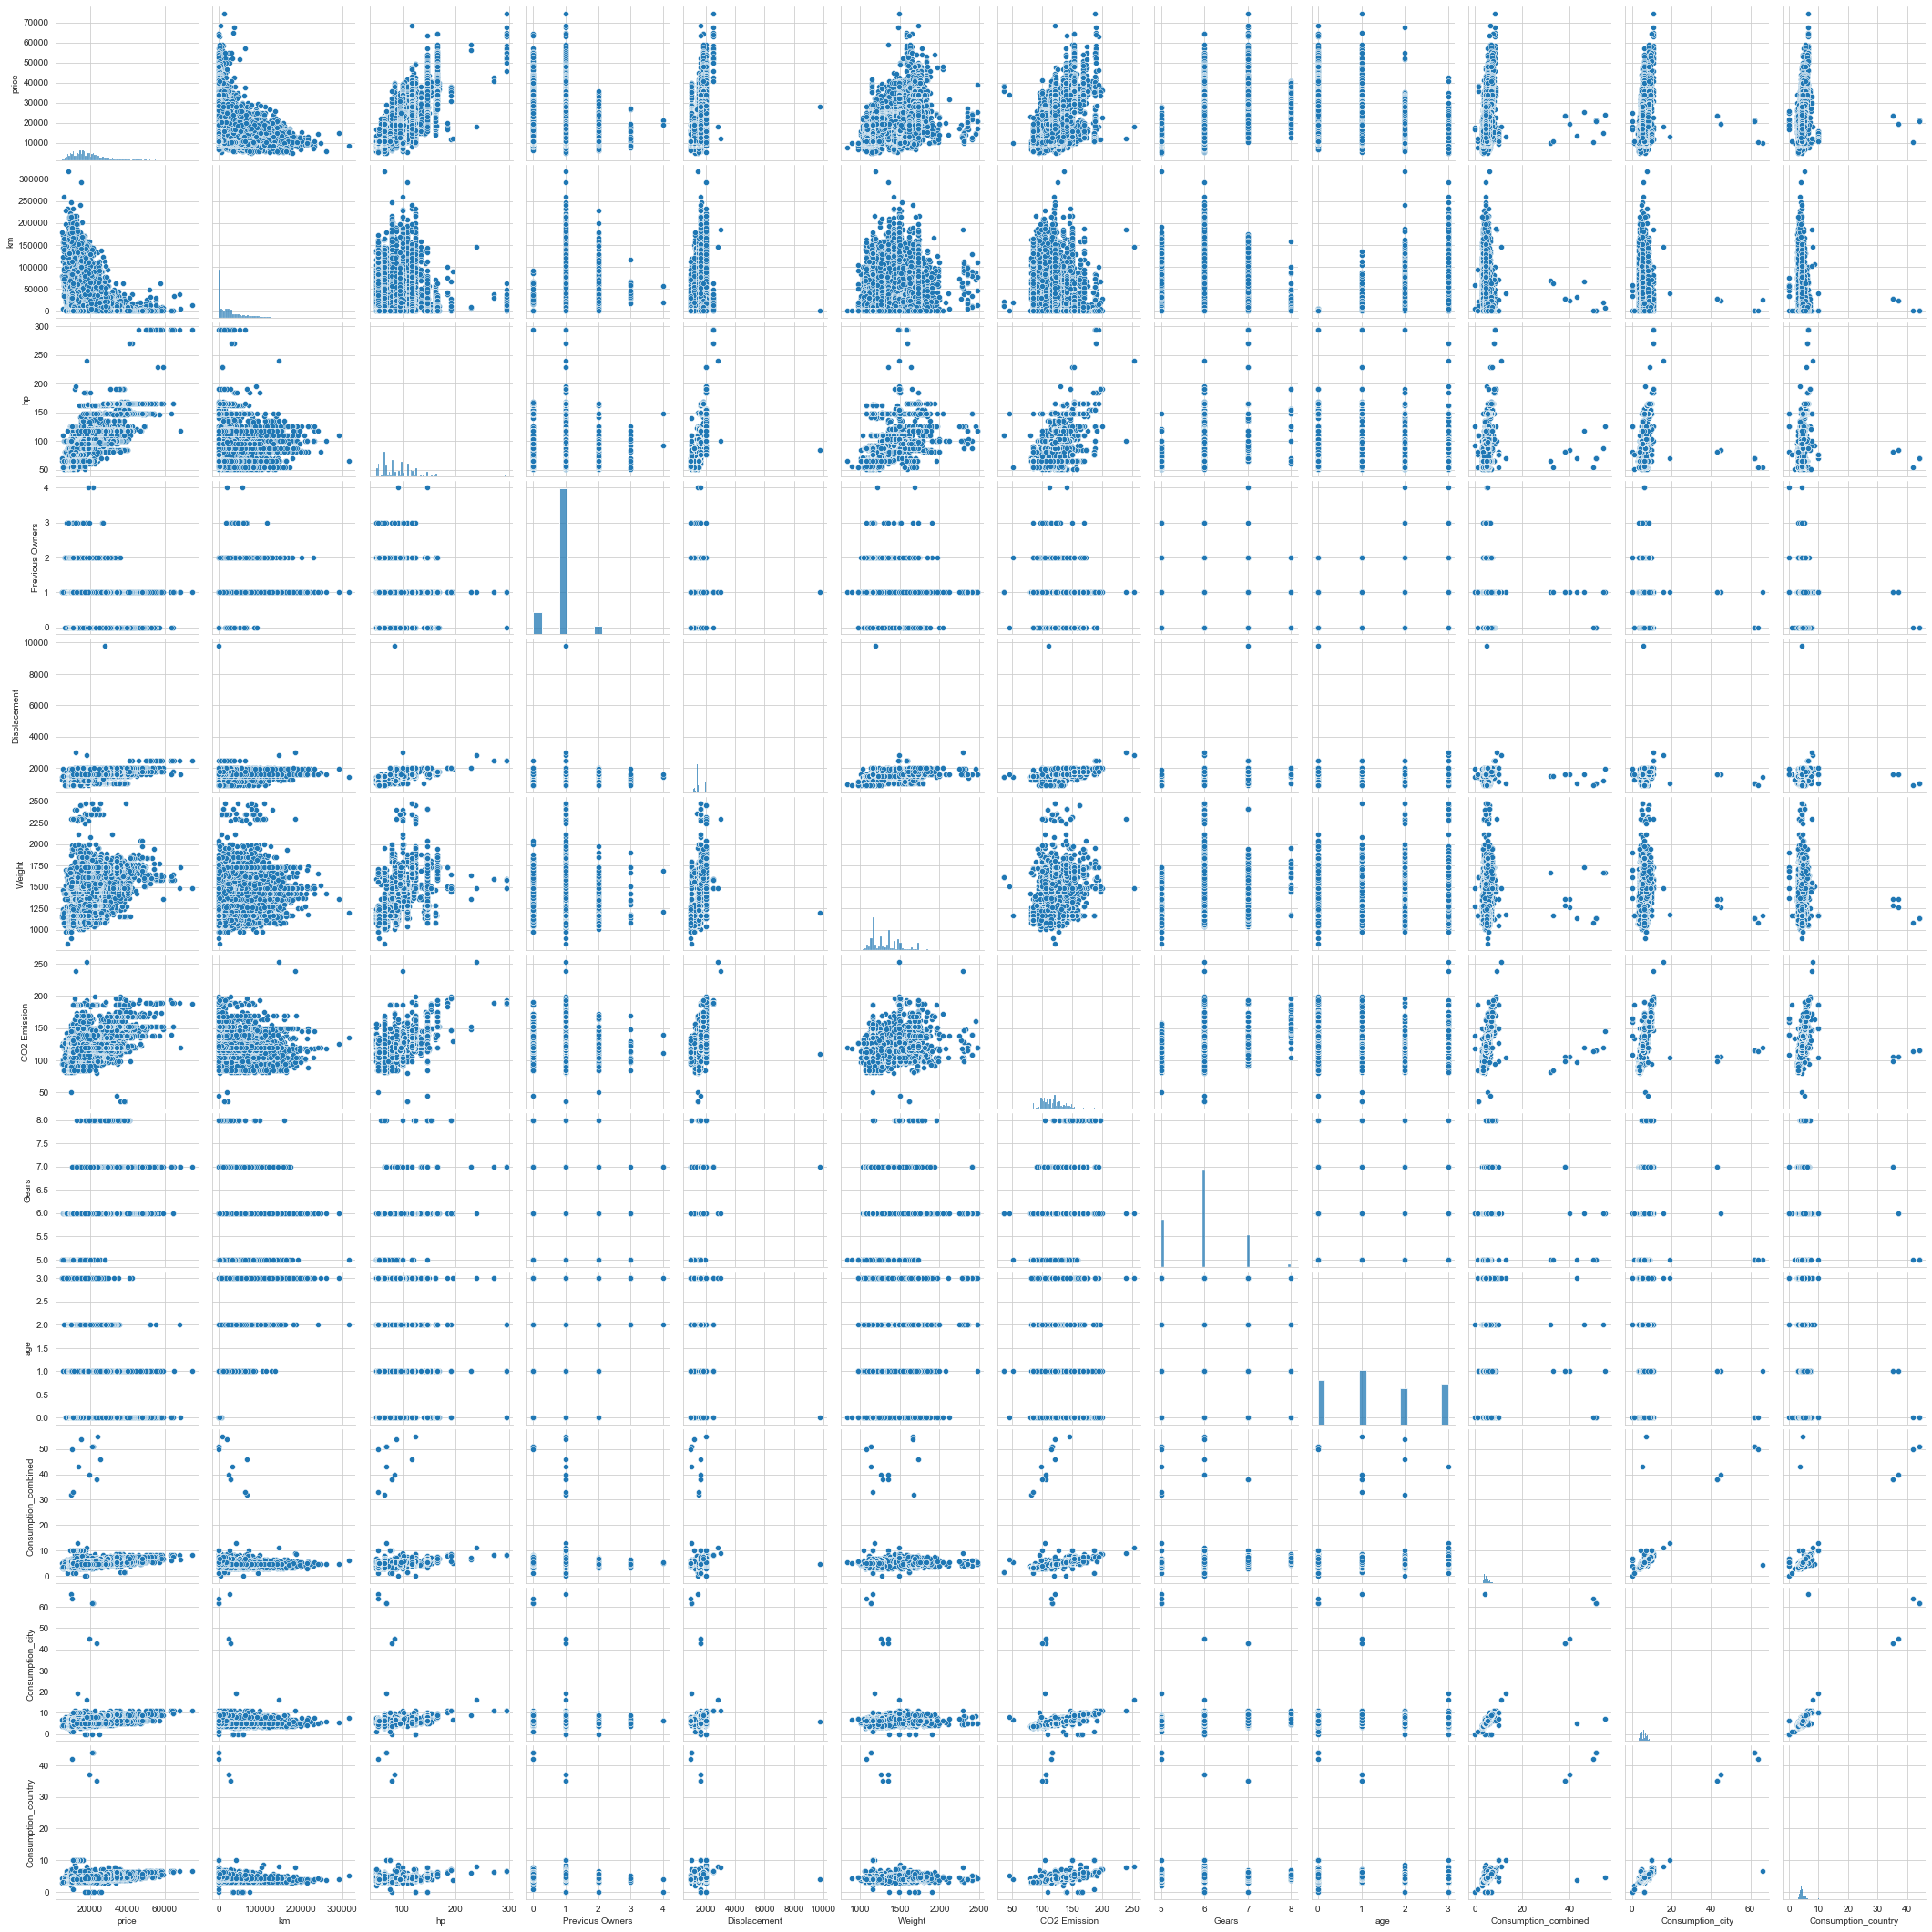

In [108]:
sns.pairplot(df_num, size=2.5);

**Because of the multicollinearity between "CO2_Emission and cons_comb", I have decided to drop cons_comb column.** 

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

In [109]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'hp', 'Type',
       'Previous Owners', 'Inspection new', 'Body Color', 'Paint Type',
       'Body Color Original', 'Model Code', 'Gearing Type', 'Displacement',
       'Weight', 'Drive chain', 'Fuel', 'CO2 Emission',
       'Comfort & Convenience', 'Entertainment & Media', 'Extras',
       'Safety & Security', 'Gears', 'age', 'Upholstery_type',
       'Consumption_combined', 'Consumption_city', 'Consumption_country'],
      dtype='object')

In [110]:
df.drop(["Consumption_city","Consumption_combined","Consumption_country"],axis=1,inplace=True)

In [111]:
df.to_csv("handling_outlier.csv", index=False)